# Natural Language Processing [test-8]

In [ ]:
#   <--------------------Solution-1-------------------->

1. Importing the necessary dependancies

In [ ]:
from sklearn import preprocessing,metrics
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, roc_curve
import pandas as pd, numpy as np
import re,nltk, string
from string import punctuation
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
#-> Reading the file as pandas Data-Frame
data = pd.read_csv('/content/eopinions-_1_.csv')
#-> 
df = pd.DataFrame(data)
df.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 600 rows and 3 columns


In [ ]:
#-> Performing Label Encoding on class_column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['class']= le.fit_transform(df['class'])

In [ ]:
df['class'].value_counts()

1    350
0    250
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


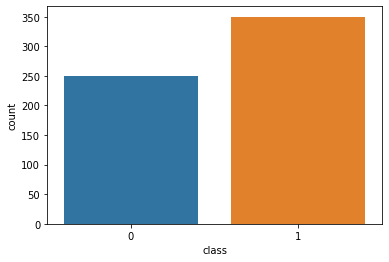

In [ ]:
#->again as a part of task plotting on basis of encoded column
import seaborn as sns
sns.countplot(df['class'])

In [ ]:
#-> Pre processing the text
df['new_text'] = df['text'].replace(to_replace=r'[^a-zA-Z ]+',value='', regex=True)
df['new_text'] = df['new_text'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
#df['new_text'] = df['new_text'].str.lower()
#df['new_text'] = df['new_text'].str.split()
df['new_text']

0       I have recently purchased a JT with moderate ...
1       I bought this product because I need instant ...
2       I have owned my Buick since  km and I am now ...
3       This was my first Digital camera so I did qui...
4       Minolta DiMAGE Hi is in a digital SLR with  m...
                             ...                        
595     Recently our  year old Nissan Stanza decided ...
596     I always do a lot of research before I buy an...
597     This car is an all around good buy  If you ar...
598     I waited to write this until I have had  mont...
599     I have been a Montero owner since about  and ...
Name: new_text, Length: 600, dtype: object

In [ ]:
#-> Vectorizing the text using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(max_df=0.95,min_df=2,max_features=100,ngram_range = (1,2),stop_words='english')


dtm=count_vect.fit_transform(df['new_text'])

repr(dtm)

print(dtm)

  (0, 53)	3
  (0, 11)	6
  (0, 37)	1
  (0, 45)	1
  (0, 89)	1
  (0, 21)	1
  (0, 75)	1
  (0, 32)	2
  (0, 66)	1
  (0, 36)	1
  (0, 19)	1
  (0, 65)	1
  (0, 68)	1
  (0, 33)	1
  (0, 22)	1
  (1, 45)	2
  (1, 89)	1
  (1, 21)	1
  (1, 32)	2
  (1, 36)	1
  (1, 19)	1
  (1, 68)	1
  (1, 33)	2
  (1, 4)	1
  (1, 56)	1
  :	:
  (598, 24)	1
  (598, 15)	2
  (598, 70)	2
  (598, 3)	2
  (598, 46)	2
  (598, 42)	2
  (598, 30)	1
  (598, 97)	1
  (598, 77)	1
  (598, 78)	1
  (598, 31)	1
  (599, 53)	1
  (599, 11)	2
  (599, 89)	2
  (599, 69)	2
  (599, 91)	2
  (599, 92)	3
  (599, 44)	2
  (599, 5)	2
  (599, 6)	1
  (599, 95)	3
  (599, 81)	1
  (599, 71)	1
  (599, 30)	1
  (599, 7)	1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer
#tf_vect=TfidfVectorizer(min_df=7,max_df=0.3,ngram_range = (1,2))
#tf_matrix=tf_vect.fit_transform(df['new_text'])

cv = count_vect.fit_transform(df['new_text'])

X=cv.toarray().tolist()
y=df.new_text.tolist()

In [ ]:
#-> Spliting the Data into 2 parts and having 80%-20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [ ]:
#-> Implementing 'Machine_Learning_Algorithm' for classification
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


In [ ]:
from sklearn.metrics import classification_report
report = confusion_matrix(y_test, y_pred)

In [ ]:
print(report)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
